In [1]:
import os, sys
sys.path.append(os.path.abspath('../..'))
import matplotlib.pyplot as plt

import floris.tools as wfct

floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.


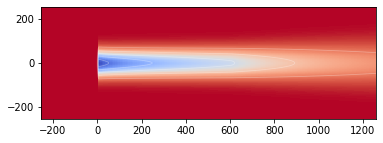

In [2]:
# Initialize the FLORIS interface fi
# For basic usage, the florice interface provides a simplified interface to
# the underlying classes
fi = wfct.floris_interface.FlorisInterface("../../examples/example_input.json")

# Calculate wake
fi.calculate_wake()

# Get horizontal plane at default height (hub-height)
hor_plane = fi.get_hor_plane()

# Plot and show
fig, ax = plt.subplots()
wfct.visualization.visualize_cut_plane(hor_plane, ax=ax)
plt.show()

floris.tools.floris_interface.FlorisInterface INFO Updating turbine: 0
floris.simulation.turbine.Turbine INFO Setting rotor_diameter to 35
floris.tools.floris_interface.FlorisInterface INFO Updating turbine: 3
floris.simulation.turbine.Turbine INFO Setting rotor_diameter to 35
floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.


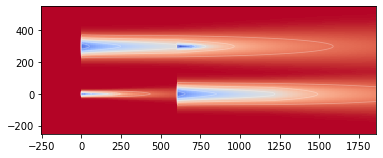

In [2]:
# Initialize the FLORIS interface fi
fi = wfct.floris_interface.FlorisInterface("../../examples/example_input.json")

# Set to 2x2 farm
fi.reinitialize_flow_field(layout_array=[[0, 0, 600, 600], [0, 300, 0, 300]])

# Change turbine 0 and 3 to have a 35 m rotor diameter
fi.change_turbine([0, 3], {"rotor_diameter": 35})

# Calculate wake
fi.calculate_wake()

# Get horizontal plane at default height (hub-height)
hor_plane = fi.get_hor_plane()

# Plot and show
fig, ax = plt.subplots()
wfct.visualization.visualize_cut_plane(hor_plane, ax=ax)
plt.show()

floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.
floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.
floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.
floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.
floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.
floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.
floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.
floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.
floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.


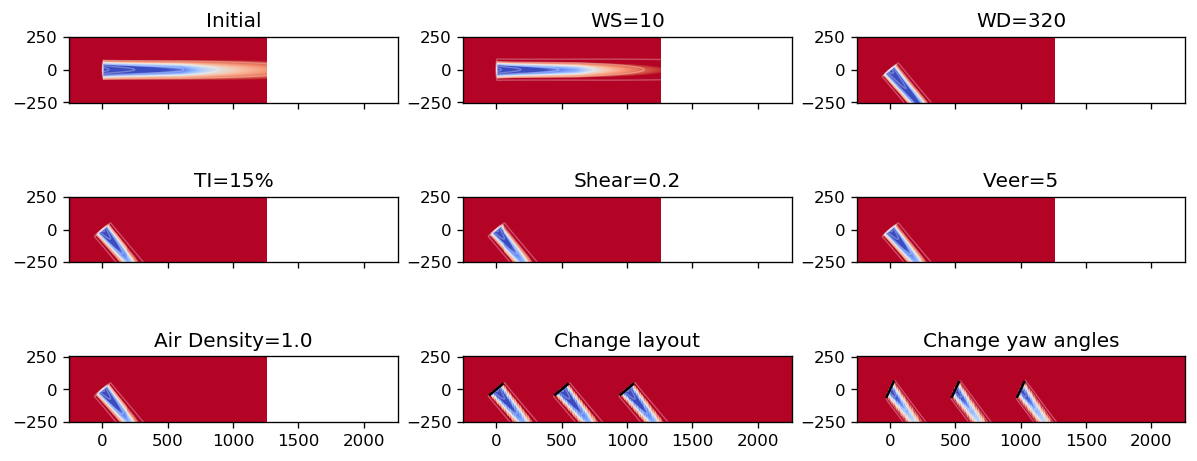

In [2]:
fi = wfct.floris_interface.FlorisInterface("../../examples/example_input.json")

# Declare a short-cut visualization function for brevity in this example
def plot_slice_shortcut(fi, ax, title):
    # Get horizontal plane at default height (hub-height)
    hor_plane = fi.get_hor_plane()
    ax.set_title(title)
    wfct.visualization.visualize_cut_plane(hor_plane, ax=ax, minSpeed=4.0, maxSpeed=8.0)


# Define a plot
fig, axarr = plt.subplots(3, 3, sharex=True, figsize=(12, 5), dpi=120)
axarr = axarr.flatten()

# Plot the initial setup
fi.calculate_wake()
plot_slice_shortcut(fi, axarr[0], "Initial")

# Change the wind speed
fi.reinitialize_flow_field(wind_speed=10.0)
fi.calculate_wake()
plot_slice_shortcut(fi, axarr[1], "WS=10")

# Change the wind direction
fi.reinitialize_flow_field(wind_direction=320.0)
fi.calculate_wake()
plot_slice_shortcut(fi, axarr[2], "WD=320")

# Change the TI
fi.reinitialize_flow_field(turbulence_intensity=0.15)
fi.calculate_wake()
plot_slice_shortcut(fi, axarr[3], "TI=15%")

# Change the shear
fi.reinitialize_flow_field(wind_shear=0.2)
fi.calculate_wake()
plot_slice_shortcut(fi, axarr[4], "Shear=0.2")

# Change the veer
fi.reinitialize_flow_field(wind_veer=5)  # TODO IS THIS RIGHT?
fi.calculate_wake()
plot_slice_shortcut(fi, axarr[5], "Veer=5")

# Change the air density
fi.reinitialize_flow_field(air_density=1.0)  # TODO IS THIS RIGHT?
fi.calculate_wake()
plot_slice_shortcut(fi, axarr[6], "Air Density=1.0")

# Change the farm layout
fi.reinitialize_flow_field(layout_array=[[0, 500, 1000], [0, 0, 0]])  # TODO IS THIS RIGHT?
fi.calculate_wake()
plot_slice_shortcut(fi, axarr[7], "Change layout")
wfct.visualization.plot_turbines_with_fi(axarr[7], fi)

# Changes the yaw angles
fi.calculate_wake(yaw_angles=[25, 25, 25])
plot_slice_shortcut(fi, axarr[8], "Change yaw angles")
wfct.visualization.plot_turbines_with_fi(axarr[8], fi)


plt.show()

In [2]:
# Initialize the FLORIS interface fi
fi = wfct.floris_interface.FlorisInterface("../../examples/example_input.json")

# Show the current model parameters
print("All the model parameters and their current values:\n")
fi.show_model_parameters()
print("\n")

# Show the current model parameters with docstring info
print("All the model parameters, their current values, and docstrings:\n")
fi.show_model_parameters(verbose=True)
print("\n")

# Show a specific model parameter with its docstring
print("A specific model parameter, its current value, and its docstring:\n")
fi.show_model_parameters(params=["ka"], verbose=False)
print("\n")

# Get the current model parameters
model_params = fi.get_model_parameters()
print("The current model parameters:\n")
print(model_params)
print("\n")

# Set parameters on the current model
print("Set specific model parameters on the current wake model:\n")
params = {
    "Wake Velocity Parameters": {"alpha": 0.2},
    "Wake Deflection Parameters": {"alpha": 0.2},
    "Wake Turbulence Parameters": {"ti_constant": 1.0},
}
fi.set_model_parameters(params)
print("\n")

# Check that the parameters were changed
print("Observe that the requested paremeters changes have been made:\n")
model_params = fi.get_model_parameters()
print(model_params)
print("\n")

floris.simulation.wake_velocity.gaussianModels.gauss_legacy.LegacyGauss INFO Current value of alpha, 0.2, is not equal to tuned value of 0.58.
floris.simulation.wake_deflection.gauss.Gauss INFO Current value of alpha, 0.2, is not equal to tuned value of 0.58.
floris.simulation.wake_turbulence.crespo_hernandez.CrespoHernandez INFO Current value of constant, 1.0, is not equal to tuned value of 0.5.


All the model parameters and their current values:

Wake Velocity Model Parameters: gauss_legacy model
-------------------------------------
alpha = 0.58
beta = 0.077
calculate_VW_velocities = True
eps_gain = 0.2
ka = 0.38
kb = 0.004
logger = <Logger floris.simulation.wake_velocity.gaussianModels.gauss_legacy.LegacyGauss (DEBUG)>
use_yaw_added_recovery = True
-------------------------------------
Wake Deflection Model Parameters: gauss model
-------------------------------------
ad = 0.0
alpha = 0.58
bd = 0.0
beta = 0.077
eps_gain = 0.2
ka = 0.38
kb = 0.004
logger = <Logger floris.simulation.wake_deflection.gauss.Gauss (DEBUG)>
use_secondary_steering = True
-------------------------------------
Wake Turbulence Model Parameters: crespo_hernandez model
-------------------------------------
logger = <Logger floris.simulation.wake_turbulence.crespo_hernandez.CrespoHernandez (DEBUG)>
ti_ai = 0.8
ti_constant = 0.5
ti_downstream = -0.32
ti_initial = 0.1
-------------------------------------



floris.simulation.wake_turbulence.crespo_hernandez.CrespoHernandez INFO Current value of constant, 0.73, is not equal to tuned value of 0.5.
floris.simulation.wake_turbulence.crespo_hernandez.CrespoHernandez INFO Current value of downstream, -0.275, is not equal to tuned value of -0.32.
floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.
floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.
floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.
c:\users\li hang\documents\projects\floris\floris\simulation\wake_velocity\turbopark.py:128: RuntimeWarning: invalid value encountered in log
  Dwx = D + ((A * I0 * D) / beta) * (term1 - term2 - np.log(term3 / term4))
floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.
floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for ho

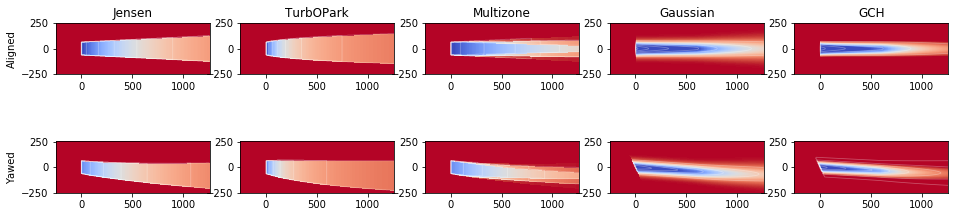

In [3]:
# Initialize the FLORIS interface for 4 seperate models defined as JSONS
fi_jensen = wfct.floris_interface.FlorisInterface("../../examples/other_jsons/jensen.json")
fi_turbopark = wfct.floris_interface.FlorisInterface("../../examples/other_jsons/turbopark.json")
fi_mz = wfct.floris_interface.FlorisInterface("../../examples/other_jsons/multizone.json")
fi_gauss = wfct.floris_interface.FlorisInterface("../../examples/other_jsons/input_legacy.json")
fi_gch = wfct.floris_interface.FlorisInterface("../../examples/example_input.json")

fig, axarr = plt.subplots(2, 5, figsize=(16, 4))


# Use a python for loop to iterate over the models and plot a horizontal cut through
# of the models for an aligned and yaw case to show some differences
for idx, (fi, name) in enumerate(
    zip(
        [fi_jensen,fi_turbopark, fi_mz, fi_gauss, fi_gch],
        ["Jensen", "TurbOPark",  "Multizone", "Gaussian", "GCH"]
    )
):

    # Aligned case
    fi.calculate_wake(yaw_angles=[0])
    ax = axarr[0, idx]
    hor_plane = fi.get_hor_plane()
    wfct.visualization.visualize_cut_plane(hor_plane, ax=ax, minSpeed=4, maxSpeed=8)
    ax.set_title(name)
    axarr[0, 0].set_ylabel("Aligned")

    # Yawed case
    fi.calculate_wake(yaw_angles=[25])
    ax = axarr[1, idx]
    hor_plane = fi.get_hor_plane()
    wfct.visualization.visualize_cut_plane(hor_plane, ax=ax, minSpeed=4, maxSpeed=8)
    axarr[1, 0].set_ylabel("Yawed")


# Show the figure
plt.show()